# Handwritten Digit Classification 


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('Shapes')
print('  X_train: ', X_train.shape, type(X_train), X_train.ndim)
print('  y_train: ', y_train.shape, type(y_train), y_train.ndim)
print('  X_test: ', X_test.shape, type(X_test), X_test.ndim)
print('  y_test: ', y_test.shape, type(y_test), y_test.ndim)

Shapes
  X_train:  (60000, 28, 28) <class 'numpy.ndarray'> 3
  y_train:  (60000,) <class 'numpy.ndarray'> 1
  X_test:  (10000, 28, 28) <class 'numpy.ndarray'> 3
  y_test:  (10000,) <class 'numpy.ndarray'> 1


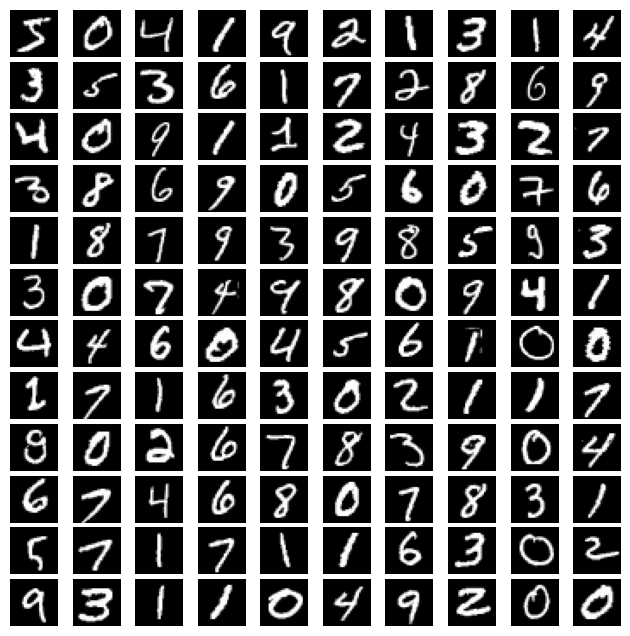

In [4]:
fig, axes = plt.subplots(12, 10, figsize=(8, 8))
for i in range(12):
    for j in range(10):
        axes[i, j].imshow(X_train[i * 10 + j], cmap='gray')
        axes[i, j].axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [5]:
for i in range(12):
    print(y_train[i * 10: (i + 1) * 10])

[5 0 4 1 9 2 1 3 1 4]
[3 5 3 6 1 7 2 8 6 9]
[4 0 9 1 1 2 4 3 2 7]
[3 8 6 9 0 5 6 0 7 6]
[1 8 7 9 3 9 8 5 9 3]
[3 0 7 4 9 8 0 9 4 1]
[4 4 6 0 4 5 6 1 0 0]
[1 7 1 6 3 0 2 1 1 7]
[9 0 2 6 7 8 3 9 0 4]
[6 7 4 6 8 0 7 8 3 1]
[5 7 1 7 1 1 6 3 0 2]
[9 3 1 1 0 4 9 2 0 0]


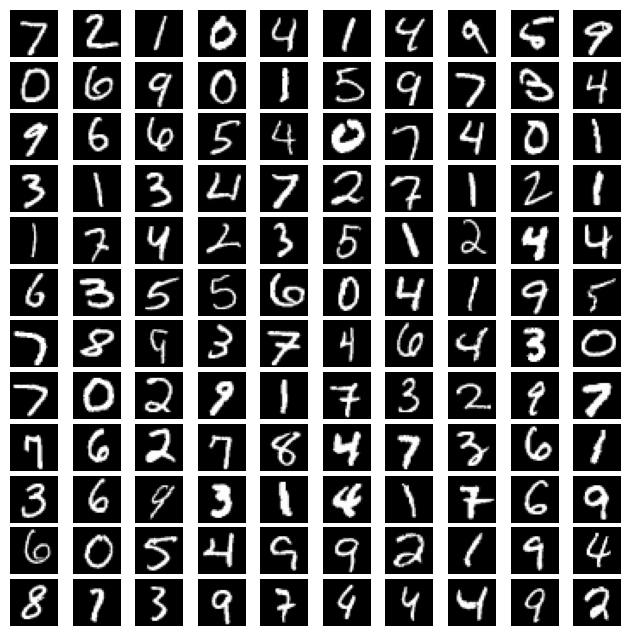

In [6]:
fig, axes = plt.subplots(12, 10, figsize=(8, 8))
for i in range(12):
    for j in range(10):
        axes[i, j].imshow(X_test[i * 10 + j], cmap='gray')
        axes[i, j].axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

In [7]:
for i in range(12):
    print(y_test[i * 10: (i + 1) * 10])

[7 2 1 0 4 1 4 9 5 9]
[0 6 9 0 1 5 9 7 3 4]
[9 6 6 5 4 0 7 4 0 1]
[3 1 3 4 7 2 7 1 2 1]
[1 7 4 2 3 5 1 2 4 4]
[6 3 5 5 6 0 4 1 9 5]
[7 8 9 3 7 4 6 4 3 0]
[7 0 2 9 1 7 3 2 9 7]
[7 6 2 7 8 4 7 3 6 1]
[3 6 9 3 1 4 1 7 6 9]
[6 0 5 4 9 9 2 1 9 4]
[8 7 3 9 7 4 4 4 9 2]


### Random Forest classifier 

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
X_1D_train = X_train.reshape(-1, 28 * 28)
X_1D_test = X_test.reshape(-1, 28 * 28)

In [10]:
print('Shapes')
print('  X_1D_train: ', X_1D_train.shape, type(X_1D_train), X_1D_train.ndim)
print('  X_1D_test: ', X_1D_test.shape, type(X_1D_test), X_1D_test.ndim)

Shapes
  X_1D_train:  (60000, 784) <class 'numpy.ndarray'> 2
  X_1D_test:  (10000, 784) <class 'numpy.ndarray'> 2


In [11]:
randomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=42)
randomForestClassifier.fit(X_1D_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

def print_reporting(prediction_train, prediction_test):
    print('Accuracy on Train set:', accuracy_score(y_train, prediction_train))
    print('Accuracy on Test set:', accuracy_score(y_test, prediction_test))
    print('\n')
   
    print('Confusion Matrix on Train set:\n', confusion_matrix(y_train, prediction_train))
    print('\n')
    print('Confusion Matrix on Test set:\n', confusion_matrix(y_test, prediction_test))
    print('\n')

    print('Precision on Train set:', precision_score(y_train, prediction_train, average=None))
    print('Precision on Test set:', precision_score(y_test, prediction_test, average=None))
    print('\n')

    print('Recall on Train set:', recall_score(y_train, prediction_train, average=None))
    print('Recall on Test set:', recall_score(y_test, prediction_test, average=None))
    print('\n')

    print('F1-Score on Train set:', f1_score(y_train, prediction_train, average=None))
    print('F1-Score on Test set:', f1_score(y_test, prediction_test, average=None))
    print('\n')

    print('Classification Report on Train set:')
    print(classification_report(y_train, prediction_train))
    print('\n')

    print('Classification Report on Test set:')
    print(classification_report(y_test, prediction_test))

# Predictions and reporting

pred_train = randomForestClassifier.predict(X_1D_train)
pred_test = randomForestClassifier.predict(X_1D_test)

print_reporting(pred_train, pred_test)


Accuracy on Train set: 1.0
Accuracy on Test set: 0.9691


Confusion Matrix on Train set:
 [[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0    0 5958    0    0    0    0    0    0    0]
 [   0    0    0 6131    0    0    0    0    0    0]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0    0 6265    0    0]
 [   0    0    0    0    0    0    0    0 5851    0]
 [   0    0    0    0    0    0    0    0    0 5949]]


Confusion Matrix on Test set:
 [[ 971    0    0    0    0    3    2    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   7    0  995    6    3    1    4    9    7    0]
 [   1    0   12  969    0    9    0    9    8    2]
 [   1    0    0    0  952    0    5    1    5   18]
 [   4    0    1   13    2  858    4    2    5    3]
 [   8    3    0    0    3  

### Logistic Regression classifier

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logisticRegression = LogisticRegression(random_state=42)
logisticRegression.fit(X_1D_train, y_train)

/Users/kalayi/miniconda3/envs/deep/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [15]:
pred_train = logisticRegression.predict(X_1D_train)
pred_test = logisticRegression.predict(X_1D_test)

print_reporting(pred_train, pred_test)

Accuracy on Train set: 0.9339166666666666
Accuracy on Test set: 0.9255


Confusion Matrix on Train set:
 [[5764    0   15    9   14   36   33   10   38    4]
 [   1 6584   32   19    6   20    3   10   55   12]
 [  28   47 5445   89   61   20   56   51  140   21]
 [  17   23  118 5582    6  162   14   50  119   40]
 [  13   22   23    9 5491    8   48   15   42  171]
 [  57   18   40  161   48 4793   82   15  160   47]
 [  34    9   40    0   35   58 5713    4   21    4]
 [  11   20   58   28   42    8    4 5896   20  178]
 [  27   93   55  122   19  136   36   18 5293   52]
 [  21   22   14   70  129   33    3  138   45 5474]]


Confusion Matrix on Test set:
 [[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3  

### Simple Convolutional Neural Network

In [16]:
X_4D_train = X_train.reshape(60000, 28, 28, 1)
X_4D_test = X_test.reshape(10000, 28, 28, 1)

In [17]:
# convert labels into one hot encoding
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [18]:
y_cat_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


In [20]:
# create CNN architecture
cnn = Sequential()
# first CNN layer
cnn.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second CNN layer
cnn.add(Conv2D(32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

cnn.add(Flatten())
# create the ANN part
cnn.add(Dense(1000, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

2023-10-18 14:23:56.404441: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2023-10-18 14:23:56.404466: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-10-18 14:23:56.404474: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-10-18 14:23:56.404756: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-18 14:23:56.405028: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


input shape-(kernel size-1)
28-(3-1)=26

((shape of filter)+Bias)* number of filters
    ((3*3)+1)*64
    
    ((3*3*64)+1)*32

In [21]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 1000)              8

In [22]:
# compile the CNN model
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = cnn.fit(X_4D_train, y_cat_train, epochs=14, batch_size=128, validation_data=(X_4D_test, y_cat_test))

Epoch 1/14


2023-10-18 14:23:57.560070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 28s 54ms/step - loss: 1.3279 - accuracy: 0.9106 - val_loss: 0.2217 - val_accuracy: 0.9633
Epoch 2/14
469/469 [==============================] - 23s 50ms/step - loss: 1.6483 - accuracy: 0.9521 - val_loss: 4.1112 - val_accuracy: 0.9622
Epoch 3/14
469/469 [==============================] - 24s 50ms/step - loss: 30.8789 - accuracy: 0.9565 - val_loss: 54.0823 - val_accuracy: 0.9673
Epoch 4/14
469/469 [==============================] - 24s 51ms/step - loss: 169.9783 - accuracy: 0.9635 - val_loss: 241.9860 - val_accuracy: 0.9743
Epoch 5/14
469/469 [==============================] - 24s 50ms/step - loss: 516.8280 - accuracy: 0.9682 - val_loss: 553.9255 - val_accuracy: 0.9784
Epoch 6/14
469/469 [==============================] - 23s 50ms/step - loss: 1041.6041 - accuracy: 0.9717 - val_loss: 1224.2379 - val_accuracy: 0.9785
Epoch 7/14
469/469 [==============================] - 24s 50ms/step - loss: 2136.8035 - accuracy: 0.9719 - val_loss: 3146.9197 - va

In [24]:
# evaluate the model
cnn.evaluate(X_4D_test, y_cat_test)

313/313 [==============================] - 13s 40ms/step - loss: 29221.8359 - accuracy: 0.9756


[29221.8359375, 0.975600004196167]

In [ ]:
# evaluate the model
cnn.evaluate(X_4D_train, y_cat_train)

1397/1875 [=====================>........] - ETA: 19s - loss: 25636.5645 - accuracy: 0.9753